In [1]:
!pip install tensorflow

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
from ultralytics import YOLO

# Cek versi
import ultralytics
ultralytics.checks()

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [8]:
from google.colab import files
files.upload()  # upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mochyusufhaidar","key":"9529559981a140f13f52dae33420641e"}'}

In [9]:
# Buat folder dan copy token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset
!kaggle datasets download -d mochyusufhaidar/dataset-sampah

# Ekstrak
!unzip -q dataset-sampah.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/mochyusufhaidar/dataset-sampah
License(s): unknown
 97% 634M/654M [00:02<00:00, 257MB/s]
100% 654M/654M [00:02<00:00, 321MB/s]


In [11]:
dataset_path = "/content/dataset/balanced_dataset"

In [12]:
import os
print(os.listdir(dataset_path))

['biological', 'paper', 'glass', 'cardboard', 'plastic', 'battery', 'clothes', 'shoes', 'metal', 'trash']


# Modelling

In [13]:
model = YOLO('yolov8n-cls.pt')
model.train(
    data='/content/dataset/balanced_dataset',
    epochs=20,
    imgsz=224,
    name='train_balanced'
)

100%|██████████| 5.31M/5.31M [00:00<00:00, 115MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/balanced_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_balanced, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pos

100%|██████████| 5.35M/5.35M [00:00<00:00, 83.4MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1974.4±779.6 MB/s, size: 62.9 KB)


train: Scanning /content/dataset/balanced_dataset_split/train... 7200 images, 0 corrupt: 100%|██████████| 7200/7200 [00:01<00:00, 5566.85it/s]

train: New cache created: /content/dataset/balanced_dataset_split/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1099.6±523.4 MB/s, size: 46.4 KB)


val: Scanning /content/dataset/balanced_dataset_split/val... 1800 images, 0 corrupt: 100%|██████████| 1800/1800 [00:00<00:00, 3626.53it/s]

val: New cache created: /content/dataset/balanced_dataset_split/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train_balanced
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/20      0.27G      2.433         16        224:   1%|▏         | 6/450 [00:01<01:19,  5.60it/s]

       1/20      0.27G      2.422         16        224:   2%|▏         | 8/450 [00:01<01:08,  6.50it/s]
100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.09it/s]

                   all      0.852      0.994



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.17it/s]

                   all      0.904      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.07it/s]

                   all       0.89      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.08it/s]

                   all      0.912      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.08it/s]

                   all      0.916      0.998



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.08it/s]

                   all       0.92      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.59it/s]

                   all      0.927      0.997



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.11it/s]

                   all      0.924      0.996

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.08it/s]

                   all      0.937      0.998



      Epoch    GPU_mem       loss  Instances       Size


      10/20     0.348G     0.2392         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.96it/s]

                   all      0.938      0.997



      Epoch    GPU_mem       loss  Instances       Size


      11/20     0.355G     0.2123         16        224: 100%|██████████| 450/450 [01:06<00:00,  6.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  4.99it/s]

                   all      0.934      0.997



      Epoch    GPU_mem       loss  Instances       Size


      12/20     0.363G     0.1912         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.04it/s]

                   all      0.938      0.998



      Epoch    GPU_mem       loss  Instances       Size


      13/20     0.371G     0.1713         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.10it/s]

                   all      0.938      0.998



      Epoch    GPU_mem       loss  Instances       Size


      14/20     0.381G     0.1688         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.06it/s]

                   all      0.944      0.998



      Epoch    GPU_mem       loss  Instances       Size


      15/20     0.389G     0.1616         16        224: 100%|██████████| 450/450 [01:04<00:00,  6.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.12it/s]

                   all      0.945      0.998



      Epoch    GPU_mem       loss  Instances       Size


      16/20     0.396G     0.1522         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.02it/s]

                   all      0.944      0.998



      Epoch    GPU_mem       loss  Instances       Size


      17/20     0.404G     0.1417         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:10<00:00,  5.44it/s]

                   all      0.944      0.998



      Epoch    GPU_mem       loss  Instances       Size


      18/20     0.412G     0.1314         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.16it/s]

                   all      0.944      0.997



      Epoch    GPU_mem       loss  Instances       Size


      19/20     0.422G     0.1142         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.07it/s]

                   all      0.944      0.997



      Epoch    GPU_mem       loss  Instances       Size


      20/20      0.43G     0.1155         16        224: 100%|██████████| 450/450 [01:05<00:00,  6.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.05it/s]

                   all      0.948      0.998



20 epochs completed in 0.427 hours.
Optimizer stripped from runs/classify/train_balanced/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train_balanced/weights/best.pt, 3.0MB

Validating runs/classify/train_balanced/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /content/dataset/balanced_dataset/train
Found 9000 images in subdirectories. Attempting to split...
Splitting /content/dataset/balanced_dataset (10 classes, 9000 images) into 80% train, 20% val...
Split complete in /content/dataset/balanced_dataset_split ✅
train: /content/dataset/balanced_dataset_split/train... found 8643 images in 10 classes ✅ 
val: /content/dataset/balanced_dataset_split/val... found 3243 images in 10 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 57/57 [00:11<00:00,  5.14it/s]


                   all      0.948      0.998
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train_balanced


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a87c391a690>
curves: []
curves_results: []
fitness: 0.9727777540683746
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9477777481079102, 'metrics/accuracy_top5': 0.9977777600288391, 'fitness': 0.9727777540683746}
save_dir: PosixPath('runs/classify/train_balanced')
speed: {'preprocess': 0.07911533166634399, 'inference': 0.3747842277769248, 'loss': 0.00034871111135241034, 'postprocess': 0.0033407538899155043}
task: 'classify'
top1: 0.9477777481079102
top5: 0.9977777600288391

In [14]:
# Muat model hasil training
model = YOLO('/content/runs/classify/train_balanced/weights/best.pt')

# Evaluasi model pada dataset validasi
metrics = model.val(data='/content/dataset/balanced_dataset_split', imgsz=224)

# Cetak metrik yang valid untuk klasifikasi
print("Top-1 Accuracy:", metrics.top1)
print("Top-5 Accuracy:", metrics.top5)
print("Kecepatan (ms per image):", metrics.speed)

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/balanced_dataset_split/train... found 8643 images in 10 classes ✅ 
val: /content/dataset/balanced_dataset_split/val... found 3243 images in 10 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1664.6±484.9 MB/s, size: 46.9 KB)


val: Scanning /content/dataset/balanced_dataset_split/val... 3243 images, 0 corrupt: 100%|██████████| 3243/3243 [00:00<00:00, 5388.01it/s]

val: New cache created: /content/dataset/balanced_dataset_split/val.cache



               classes   top1_acc   top5_acc: 100%|██████████| 203/203 [00:21<00:00,  9.31it/s]


                   all       0.97      0.999
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val
Top-1 Accuracy: 0.9703977704048157
Top-5 Accuracy: 0.9990749359130859
Kecepatan (ms per image): {'preprocess': 0.08636964323191162, 'inference': 0.5886684628436092, 'loss': 0.001654009867587447, 'postprocess': 0.004047272587781961}


#Menghitung Score

In [15]:
from ultralytics import YOLO
from pathlib import Path
from PIL import Image
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Muat model
model = YOLO('/content/runs/classify/train_balanced/weights/best.pt')

# Path ke folder validasi
val_dir = Path('/content/dataset/balanced_dataset_split/val')

# Ambil nama kelas berdasarkan folder
class_names = sorted([d.name for d in val_dir.iterdir() if d.is_dir()])

# Simpan label asli dan prediksi
y_true, y_pred = [], []

for label_idx, class_name in enumerate(class_names):
    img_paths = list((val_dir / class_name).glob('*'))
    for img_path in img_paths:
        img = Image.open(img_path).convert('RGB')
        results = model.predict(img, imgsz=224, verbose=False)
        pred_idx = int(np.argmax(results[0].probs.data.cpu().numpy()))

        y_true.append(label_idx)
        y_pred.append(pred_idx)

# Hitung metrik klasifikasi
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_names))

# Matriks kebingungan
print("=== Confusion Matrix ===")
print(confusion_matrix(y_true, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

     battery       0.98      0.99      0.98       326
  biological       0.99      0.98      0.99       327
   cardboard       0.97      0.97      0.97       322
     clothes       0.99      0.99      0.99       319
       glass       0.97      0.94      0.96       320
       metal       0.94      0.96      0.95       320
       paper       0.98      0.96      0.97       332
     plastic       0.97      0.95      0.96       326
       shoes       0.96      0.99      0.98       327
       trash       0.96      0.97      0.97       324

    accuracy                           0.97      3243
   macro avg       0.97      0.97      0.97      3243
weighted avg       0.97      0.97      0.97      3243

=== Confusion Matrix ===
[[323   0   1   0   0   1   1   0   0   0]
 [  0 322   0   0   0   1   1   0   3   0]
 [  1   0 311   0   0   1   5   0   2   2]
 [  0   0   0 316   0   0   0   0   3   0]
 [  0   1   1

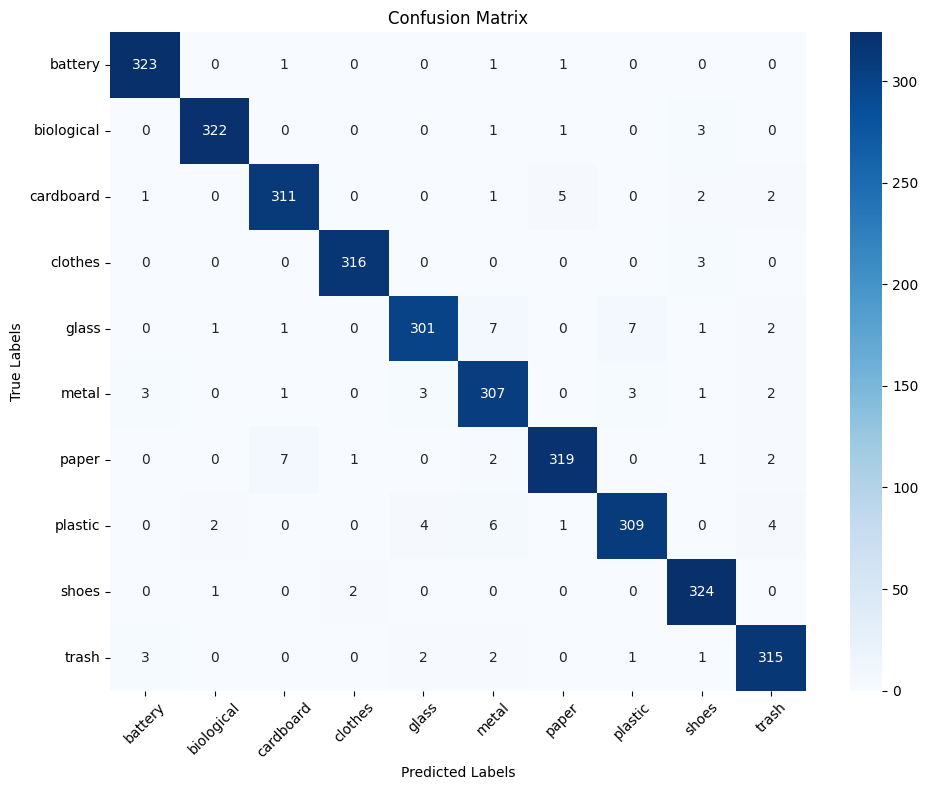

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Saving images.jpg to images.jpg

image 1/1 /content/images.jpg: 224x224 paper 0.66, cardboard 0.33, trash 0.01, battery 0.00, metal 0.00, 4.4ms
Speed: 3.8ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


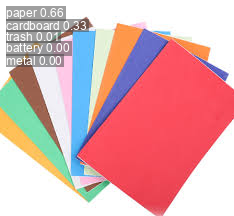


Prediksi utama: paper


In [17]:
from google.colab import files
from ultralytics import YOLO

# Upload gambar
uploaded = files.upload()

# Ambil path gambar
for filename in uploaded.keys():
    image_path = filename

# Load model
model = YOLO('runs/classify/train_balanced/weights/best.pt')

# Prediksi gambar
results = model(image_path)

# Tampilkan hasil prediksi
results[0].show()  # akses elemen pertama dari list dan tampilkan hasil prediksi

# Tampilkan kelas prediksi teratas
top_idx = results[0].probs.top1
top_name = results[0].names[top_idx]
print(f"\nPrediksi utama: {top_name}")

In [19]:
model = YOLO('runs/classify/train_balanced/weights/best.pt')  # load model terbaik
model.save('my_final_model.pt')  # simpan ulang dengan nama yang kamu inginkan

model.export(format='tflite')   # untuk TensorFlow Lite (.tflite)
model.export(format='tfjs')     # untuk TensorFlow.js (.json + bin files)
model.export(format='saved_model')  # menyimpan dalam format TensorFlow SavedModel

Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,447,690 parameters, 0 gradients, 3.3 GFLOPs

PyTorch: starting from 'runs/classify/train_balanced/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 10) (2.8 MB)

TensorFlow SavedModel: starting export with tensorflow 2.18.0...

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 0.8s, saved as 'runs/classify/train_balanced/weights/best.onnx' (5.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.10...
Saved artifact at 'runs/classify/train_balanced/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 224, 224, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 10), dtype=tf.float32, name=None)
Captures:
  134723608830864: TensorSpec(shape=(4, 2)

'runs/classify/train_balanced/weights/best_saved_model'